In [11]:
# get source index based on SSTc2d/SSTgb id
SSTid = 'J032800.3+300801'
from astropy.io import ascii

# Table: Properties of the c2d+GB YSOs
# ================================================================================
# Byte-by-byte Description of file: apjs519129t2_mrt.txt
# --------------------------------------------------------------------------------
#    Bytes Format Units  Label   Explanations
# --------------------------------------------------------------------------------
#    1-  4 I4     ---    Index   Index
#    6- 21 A16    ---    Cloud   Cloud identifier
#   23- 38 A16    ---    ID      SSTc2d or SSTgb + Spitzer source name  
#   40- 43 F4.1   mag    AV      The V band extinction 
#   45- 51 F7.2   ---    alpha   Observed spectral index
#   53- 58 F6.1   K      Tbol    Observed bolometric temperature
#   60- 69 F10.5  solLum Lbol    Observed bolometric luminosity
#   71- 77 F7.2   ---    alpha'  Extinction corrected spectral index
#   79- 84 F6.1   K      Tbol'   Extinction corrected bolometric temperature
#   86- 95 F10.5  solLum Lbol'   Extinction corrected bolometric luminosity
#   97- 97 A1     ---    AGB?    A likely AGB? Y or N
#   99- 99 A1     ---    Core?   Source has a core?
# --------------------------------------------------------------------------------


filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t2_mrt.txt'
data = ascii.read(filename, data_start=24, delimiter=' ',
                  names=['Index','Cloud','SSTid','Av','alpha','T_bol','L_bol',
                         'alpha_extcor','T_bol_extcor','L_bol_extcor','AGB_flag','Core_flag'])

data[data['SSTid'] == SSTid]

Index,Cloud,SSTid,Av,alpha,T_bol,L_bol,alpha_extcor,T_bol_extcor,L_bol_extcor,AGB_flag,Core_flag
int64,str16,str16,float64,float64,float64,float64,float64,float64,float64,str1,str1
2369,Perseus,J032800.3+300801,5.9,0.95,230.0,0.25,0.98,280.0,0.29,N,Y


### Uncertainty of extinction correction on alpha

In [13]:
print(data['alpha_extcor'].max())

4.89


In [18]:
import numpy as np
classI = data['alpha_extcor'] > 0.3
flat = (data['alpha_extcor'] <= 0.3) & (data['alpha_extcor'] >= -0.3)
classII = (data['alpha_extcor'] < -0.3) & (data['alpha_extcor'] != -990)

diff_abs = np.absolute(data['alpha']-data['alpha_extcor'])
diff = data['alpha']-data['alpha_extcor']
print(np.mean(diff[classI]))
print(np.mean(diff[flat]))
print(np.mean(diff[classII]))

print(np.mean(diff_abs[classI]))
print(np.mean(diff_abs[flat]))
print(np.mean(diff_abs[classII]))

0.095875
0.178443396226
0.371696795399
0.20875
0.214669811321
0.375986031224


In [10]:
# get IRAC fluxes out from Dunham+16 table 2 for given source index
from astropy.io import ascii
from pprint import pprint

# ================================================================================
# Byte-by-byte Description of file: apjs519129t4_mrt.txt
# --------------------------------------------------------------------------------
#    Bytes Format Units Label  Explanations
# --------------------------------------------------------------------------------
#    1-  4 I4     ---   Index  Index 
#    6- 13 F8.2   mJy   F1.25  J band 1.25 micron flux density
#   15- 24 F10.4  mJy  eF1.25  Uncertainty in F1.25
#   26- 34 F9.3   mJy   F1.65  H band 1.65 micron flux density
#   36- 44 F9.4   mJy  eF1.65  Uncertainty in F1.65
#   46- 54 F9.2   mJy   F2.17  K_S_ band 2.17 micron flux density 
#   56- 64 F9.3   mJy  eF2.17  Uncertainty in F2.17
#   66- 74 F9.4   mJy   F3.6   Spitzer/IRAC 3.6 micron flux density
#   76- 84 F9.4   mJy  eF3.6   Uncertainty in F3.6
#   86- 93 F8.3   mJy   F4.5   Spitzer/IRAC 4.5 micron flux density
#   95-103 F9.4   mJy  eF4.5   Uncertainty in F4.5
#  105-112 F8.2   mJy   F5.8   Spitzer/IRAC 5.8 micron flux density
#  114-121 F8.3   mJy  eF5.8   Uncertainty in F5.8
#  123-130 F8.2   mJy   F8.0   Spitzer/IRAC 8.0 micron flux density
#  132-139 F8.3   mJy  eF8.0   Uncertainty in F8.0
#  141-148 F8.2   mJy   F24    Spitzer/MIPS 24 micron flux density
#  150-156 F7.2   mJy  eF24    Uncertainty in F24
#  158-163 I6     mJy   F70    Spitzer/MIPS 70 micron flux density
#  165-171 F7.1   mJy  eF70    Uncertainty in F70
# --------------------------------------------------------------------------------

# no extinction correction
filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t3_mrt.txt'
# extinction corrected
# filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t4_mrt.txt'
data = ascii.read(filename, data_start=31, names=['Index','F_J','err_J','F_H','err_H','F_Ks','err_Ks','F_IRAC1',
                                                  'err_IRAC1','F_IRAC2','err_IRAC2','F_IRAC3','err_IRAC3','F_IRAC4',
                                                  'err_IRAC4','F_MIPS24','err_MIPS24','F_MIPS70','err_MIPS70'])

data[data['Index'] == 1552]

Index,F_J,err_J,F_H,err_H,F_Ks,err_Ks,F_IRAC1,err_IRAC1,F_IRAC2,err_IRAC2,F_IRAC3,err_IRAC3,F_IRAC4,err_IRAC4,F_MIPS24,err_MIPS24,F_MIPS70,err_MIPS70
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
1552,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.3,0.29,4.9,0.49,3.6,0.51,2.3,0.44,80.0,7.5,11000,1200.0


In [26]:
def IRACmag2flux(mag, mag_err):
    # calculate the absolute flux for IRAC given magnitude
    import numpy as np 
    # Jy
    zero_mag_flux = np.array([280.9, 179.7, 115.0, 64.9])
    zero_mag_err = np.array([4.1, 2.6, 1.7, 0.9])

    # formula: F_v = F_v,o * 10^(-2/5*m)
    # error propagation: f = a^(b*A); sigma_f^2 = f^2*(b*ln(a)*sigma_A)^2
    #                    f = AB; sigma_f^2 = (sigma_A/A)^2+(sigma_B/B)^2

    flux = zero_mag_flux * 10**(-2./5*mag)
    flux_err_expo = 10**(-2./5*mag)*((-2./5*np.log(10)*mag_err)**2)**0.5
    flux_err = ((zero_mag_err/zero_mag_flux)**2 + (flux_err_expo/10**(-2./5*mag))**2)**0.5

    return flux, flux_err

def MIPSmag2flux(mag, mag_err):
    # calculate the absolute flux for IRAC given magnitude
    import numpy as np 
    # Jy
    zero_mag_flux = np.array([7.17, 0.778, 0.159])
    zero_mag_err = np.array([0.11, 0.012, 0.020])

    # formula: F_v = F_v,o * 10^(-2/5*m)
    # error propagation: f = a^(b*A); sigma_f^2 = f^2*(b*ln(a)*sigma_A)^2
    #                    f = AB; sigma_f^2 = (sigma_A/A)^2+(sigma_B/B)^2

    flux = zero_mag_flux * 10**(-2./5*mag)
    flux_err_expo = 10**(-2./5*mag)*((-2./5*np.log(10)*mag_err)**2)**0.5
    flux_err = ((zero_mag_err/zero_mag_flux)**2 + (flux_err_expo/10**(-2./5*mag))**2)**0.5

    return flux, flux_err

mag = np.array([9.15, 7.76, 6.72, 5.75])
mag_err = np.array([0.05, 0.05, 0.05, 0.05])
flux, flux_err = IRACmag2flux(mag, mag_err)

print('IRAC')
print(flux)
print(flux_err)

mag = np.array([1.43, -1.92, -4.33])
mag_err = np.array([0.04, 0.22, 0.34])
flux, flux_err = MIPSmag2flux(mag, mag_err)

print('MIPS')
print(flux)
print(flux_err)

IRAC
[ 0.06145422  0.14143213  0.23588365  0.32527051]
[ 0.04830943  0.04827109  0.04836615  0.04809435]
MIPS
[ 1.92096369  4.56015492  8.5782189 ]
[ 0.03990807  0.20321369  0.3374701 ]


# PACS RebinnedCube inspection (HIPE v15)

In [1]:
from astropy.io import fits

filedir = '/Volumes/SD-Mac/herschel.pacs.signal.PacsRebinnedCube/'
filelist = ['hpacs1342269932_00hps3d_02.fits',
            'hpacs1342269932_00hps3d_03.fits',
            'hpacs1342269933_00hps3d_00.fits',
            'hpacs1342269933_00hps3d_01.fits']

hdulist = fits.open(filedir+filelist[0])

In [4]:
hdulist[0].header

SIMPLE  =                    T / Java FITS: Sat Mar 11 17:53:52 CST 2017        
BITPIX  =                   32 / bits per data value                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / May contain datasets                           
TIMESYS = 'UTC     '           / All dates are in UTC time                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
         ---------------Herschel FITS Data Generator---------------             
         This product is generated by Herschel software.                        
HCSS____=                   

# Check if the wavelength shift bumped into other lines

In [2]:
filename = '/Volumes/SD-Mac/CDF_archive_v2/BHR71/spire/advanced_products/BHR71_spire_corrected_lines.txt'
from astropy.io import ascii
data = ascii.read(filename)

(0, 2)

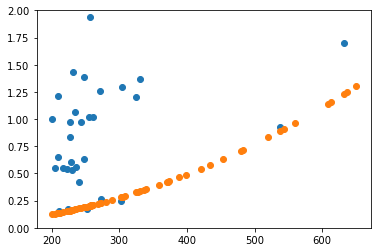

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as const
c = const.c.cgs.value
wl_shift = 6.8
dl = 1.5*1.207*(1.2*1e9*(data['LabWL(um)']*1e-4)**2/c)/2.354 * 1e4

nearest_line = np.empty_like(data['LabWL(um)'])

for i, wl in enumerate(data['LabWL(um)']):
    nearest_line[i] = np.sort(abs(wl+wl_shift-data['LabWL(um)']))[0]
plt.plot(data['LabWL(um)'], nearest_line, 'o')
plt.plot(data['LabWL(um)'], dl,'o')
plt.ylim([0,2])

In [9]:
print(nearest_line)

LabWL(um)
---------
      1.0
      1.0
  0.16286
  0.36955
  0.19329
      1.0
      1.0
      1.0
  0.32808
      1.0
      ...
      1.0
  0.47504
  0.21744
  0.23535
  0.94223
      1.0
      1.0
   0.0116
      1.0
   0.0416
      1.0
Length = 64 rows


In [11]:
from astropy.io import ascii
data = ascii.read('/Users/yaolun/data/CDF_archive_v2/CDF_archive_v2_lines.txt')

In [13]:
data

Object,Line,LabWL(um),ObsWL(um),Sig_Cen(um),Str(W/cm2),Sig_str(W/cm2),FWHM(um),Sig_FWHM(um),Base(W/cm2/um),Noise(W/cm2/um),SNR,E_u(K),A(s-1),g,RA(deg),Dec(deg),Pixel_No.,Blend,Validity
str10,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str5,str14,int64
B1-a,o-H2O8_27-7_16,55.13238,55.09925,-999.0,5.136442e-21,1.588567e-21,0.03899,-998.0,-5.290667e-20,7.962727e-20,1.55499,1274.2,1.897,51,53.324404,31.1379872,1,x,0
B1-a,p-H2O10_19-10_010,56.02824,56.03881,0.01472,2.092911e-21,1.313723e-21,0.03905,-998.0,-3.543486e-20,6.716622e-20,0.750047,1860.4,0.5375,21,53.3243991,31.1380018,1,x,1
B1-a,CO47-46,56.1219,56.12679,0.02667,-1.147048e-21,1.303944e-21,0.03905,-998.0,-6.353007e-21,6.461595e-20,0.427236,6195.57,0.006326,95,53.3244083,31.1379974,1,x,1
B1-a,p-H2O4_31-3_22,56.3264,56.35006,0.02095,-1.441249e-21,1.286407e-21,0.03906,-998.0,-4.46831e-21,6.962862e-20,0.498015,552.3,1.452,9,53.3244004,31.1380031,1,x,1
B1-a,CO46-45,57.30773,57.29693,0.02122,-1.780633e-21,1.607922e-21,0.03912,-998.0,-2.650284e-20,7.642617e-20,0.559744,5939.21,0.006091,93,53.3244017,31.1379967,1,x,1
B1-a,o-H2O7_52-8_27,57.39511,57.41648,0.01259,-2.952614e-21,1.581039e-21,0.03912,-998.0,-3.64452e-20,7.529918e-20,0.941935,1524.9,0.0007476,45,53.3244095,31.1379993,1,x,1
B1-a,p-H2O4_22-3_13,57.63798,57.67123,-999.0,-1.577924e-21,1.227709e-21,0.03914,-998.0,-2.688706e-20,7.114098e-20,0.532627,454.3,0.3785,9,53.3244107,31.137993,1,Red,0
B1-a,p-H2O8_17-7_26,57.7108,57.70856,0.01064,-2.623239e-21,1.187444e-21,0.03914,-998.0,-2.455292e-20,6.166914e-20,1.021368,1270.3,1.629,17,53.3244171,31.1379924,1,Red/Blue,0
B1-a,p-H2O6_42-7_17,58.37823,58.34495,-999.0,-2.592686e-21,1.100532e-21,0.03918,-998.0,-1.755552e-20,5.314757e-20,1.170294,1090.3,0.000417,13,53.3244372,31.1379933,1,x,0


In [25]:
data = data[(data['Validity'] == 1) & (data['Pixel_No.'] == 'c')]
data[(data['Line'] == 'p-H2O3_31-2_20')+(data['Line'] == 'o-H2O3_30-2_21')]

Object,Line,LabWL(um),ObsWL(um),Sig_Cen(um),Str(W/cm2),Sig_str(W/cm2),FWHM(um),Sig_FWHM(um),Base(W/cm2/um),Noise(W/cm2/um),SNR,E_u(K),A(s-1),g,RA(deg),Dec(deg),Pixel_No.,Blend,Validity
str10,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str5,str14,int64
B1-a,o-H2O3_30-2_21,66.43937,66.44262,0.00483,1.219925e-20,2.492389e-21,0.03939,-998.0,7.295499e-19,1.32022e-19,2.205006,410.7,1.243,21,53.3205011,31.1319188,c,x,1
B1-a,p-H2O3_31-2_20,67.09082,67.08543,0.01897,-3.081455e-21,2.470607e-21,0.03938,-998.0,7.252255e-19,1.247231e-19,0.589599,410.4,1.222,7,53.3205011,31.1319188,c,x,1
B1-c,o-H2O3_30-2_21,66.43937,66.45745,0.01313,-3.031157e-21,1.681795e-21,0.03939,-998.0,1.270332e-18,8.14401e-20,0.888164,410.7,1.243,21,53.325185,31.158774,c,x,1
B1-c,p-H2O3_31-2_20,67.09082,67.0887,0.00837,-3.894187e-21,1.377038e-21,0.03938,-998.0,1.246419e-18,7.45312e-20,1.246886,410.4,1.222,7,53.325185,31.158774,c,x,1
B335,o-H2O3_30-2_21,66.43937,66.44663,0.00686,2.874024e-21,8.334282e-22,0.03939,-998.0,1.00082e-18,4.838126e-20,1.417542,410.7,1.243,21,294.2535754,7.5692374,c,x,1
B335,p-H2O3_31-2_20,67.09082,67.09438,0.04859,4.439251e-22,9.117527e-22,0.03938,-998.0,1.018107e-18,4.679756e-20,0.226378,410.4,1.222,7,294.2535754,7.5692374,c,x,1
BHR71,o-H2O3_30-2_21,66.43937,66.42358,0.00803,3.904523e-21,1.324553e-21,0.03939,-998.0,7.766687e-18,7.311104e-20,1.274406,410.7,1.243,21,180.4007403,-65.1479025,c,x,1
BHR71,p-H2O3_31-2_20,67.09082,67.09226,0.01277,-2.573727e-21,1.389576e-21,0.03938,-998.0,7.833954e-18,6.53068e-20,0.940486,410.4,1.222,7,180.4007403,-65.1479025,c,x,1
GSS30-IRS1,o-H2O3_30-2_21,66.43937,66.45057,0.00123,3.563073e-20,1.847483e-21,0.03939,-998.0,2.448813e-17,1.067922e-19,7.961746,410.7,1.243,21,246.5887611,-24.3842757,c,x,1
